In [70]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from numpy import dot
from numpy.linalg import norm


# Let’s take a quick look at the dataset

In [71]:
data = pd.read_csv("data.csv")
data_copy = data.copy()
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


# selecting a song name to make recommendation

# Analysing the data

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [73]:
# shows the total number of unique values in every column of dataset
data.nunique()

valence               1733
year                   100
acousticness          4689
artists              34088
danceability          1240
duration_ms          51755
energy                2332
explicit                 2
id                  170653
instrumentalness      5401
key                     12
liveness              1740
loudness             25410
mode                     2
name                133638
popularity             100
release_date         11244
speechiness           1626
tempo                84694
dtype: int64

In [74]:
# get the number of null values in each column of dataset
data.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

# Creating a sample of data to reduce training time

In [75]:
data = data.head(10000)
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982000,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732000,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967000,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957000,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.8580,1971,0.686000,['Tom T. Hall'],0.628,164720,0.433,0,1sfXFEpGVK5s5i8eHEtNPj,0.000005,1,0.0932,-10.876,1,The Year That Clayton Delaney Died,50,1971-01-01,0.0290,133.088
9996,0.4740,1971,0.000394,['Black Sabbath'],0.386,326001,0.679,0,3muMI7YXx7JU3yaaJzWVPw,0.001230,7,0.1240,-13.233,1,After Forever - 2014 Remaster,45,1971-07-21,0.0354,95.103
9997,0.4970,1971,0.843000,['Carole King'],0.661,186907,0.341,0,4EGyc152dlYpuQZ47cRC8j,0.000013,8,0.1090,-11.175,1,Beautiful,50,1971,0.0284,77.066
9998,0.2090,1971,0.284000,"['Paul Revere & The Raiders', 'The Raiders']",0.639,171933,0.385,0,3mDOHVY9MWZOTODSNF5GBj,0.001930,2,0.0873,-13.253,1,Indian Reservation (The Lament of the Cherokee...,47,1971,0.0759,131.714


# Lets create pivot table
pivot table turns the data to view it from different perspectives.

In [76]:
song_features =data.pivot_table(index="name",columns="id",values="popularity").fillna(0) # filling null values with 0
song_features.head()

id,004cCP7Csq7U0m67DDzEFs,006fbuXS6rRAWlUEaklCmt,007PHg6gge5dW1wnOEtucm,007cHgcM8RRS4IYQOaPQ6u,008X8kpgdmgWnoYB90s9Ap,008gJLIYowhUcrEMEc8zQr,008wkJY1GYw0177yFVCM2j,009lp1WlnfEXPW4h6mCKCr,00CmjeeHvAVKvx3tcIiZTy,00CtR42p0MqXmjD2KqS4av,...,7z2kFmHEirELsi9HUKEoGP,7zQsqDfc2c7dBCuBtXETsz,7zVZF0OgDJkFJohnlKwEpa,7zdqEebfxYBKKYfLpRDcZb,7zeFeBZVVmhlEFWxPLfxIn,7zmVAVcT1oho7iWJGpApkE,7zo874QI1WRvHklBM9qjws,7zph0VMbYl7KoqReyowKiv,7zrxGPR1UVK2iSK793vLPl,7zxiwcqLQyWcLdThrsYklu
name,,,,,,,,,,,,,,,,,,,,,
"""A"" You're Adorable",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Jubel"" - Overture, Op. 59",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
' Cello Song,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'A vucchella,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Cause I Feel Lowdown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Converting pivot table into Array matrix

In [77]:
from scipy.sparse import csr_matrix

# Converting the pivot table into matrix
# will give this matrix to algorithm as input
song_features_matrix = csr_matrix(song_features.values)

# KNN
Using cosine similarity to get the similarities between the songs

In [78]:
from sklearn.neighbors import NearestNeighbors

# Initializing the algorithm/model
model_knn = NearestNeighbors(metric="cosine",algorithm="brute")
# Training the model
model_knn.fit(song_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [79]:
song_features.shape

(8664, 10000)

# selecting a song name to make recommendation

In [80]:
SONG_NAME = "Gati Bali"

query_index = 0
for data in song_features.index:
    
    if SONG_NAME.lower().strip() in data.lower():
        print(query_index)
        break
    query_index += 1


2416


In [81]:
print(query_index)
# Predicting the distances & indices of songs to give recommendation
distance , indices = model_knn.kneighbors(song_features.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

2416


# Make Recommendation

In [82]:
for i in range(0, len(distance.flatten())): #The flatten() function is used to get a copy of an given array collapsed into one dimension.
    if i == 0:
        print("Recommendation for {0}:\n".format(song_features.index[query_index]))
    else:
        print("{0}:{1}, with distance of {2}:".format(i,song_features.index[indices.flatten()[i]],distance.flatten()[i]))

Recommendation for Gati Bali:

1:Ran Kan Kan, with distance of 1.0:
2:Rani Rani Aao Sunaoon, with distance of 1.0:
3:Ravo Govardhana Giridhari, with distance of 1.0:
4:Ramona - Remasterizado, with distance of 1.0:
5:Rawhide (with Jimmy Carroll & His Orchestra), with distance of 1.0:


# Selecting a random song to give recommendation

In [83]:
query_index = np.random.choice(song_features.shape[0])
print(query_index)
distance , indices = model_knn.kneighbors(song_features.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

7223


In [84]:
selected_song = song_features.index[query_index]
all_knn_recommended = []

for i in range(0, len(distance.flatten())): #The flatten() function is used to get a copy of an given array collapsed into one dimension.
    if i == 0:
        print("Recommendation for {0}:\n".format(song_features.index[query_index]))
    else:
        print("{0}:{1}, with distance of {2}:".format(i,song_features.index[indices.flatten()[i]],distance.flatten()[i]))

    all_knn_recommended.append(song_features.index[indices.flatten()[i]])

Recommendation for The Spell - Extended Version:

1:Rave On, with distance of 1.0:
2:Ran Kan Kan, with distance of 1.0:
3:Rawhide, with distance of 1.0:
4:Rani Rani Aao Sunaoon, with distance of 1.0:
5:Rawhide (with Jimmy Carroll & His Orchestra), with distance of 1.0:


## Calculating overall performance based on similarity

In [85]:
average_similarity_knn = []
Euclidean_knn = []

select_song_features = data_copy[data_copy.name == selected_song].drop(columns=['artists','id', 'name', 'release_date' ]).values[0]

for song in all_knn_recommended:
    recommended_song_feature = data_copy[data_copy.name == song].drop(columns=['artists','id', 'name', 'release_date' ]).values[0]

    result = dot(select_song_features, recommended_song_feature)/(norm(select_song_features)*norm(recommended_song_feature))
    average_similarity_knn.append(result)
    dist = np.linalg.norm(recommended_song_feature - select_song_features)
    Euclidean_knn.append(dist)

print("Average Similarity KNN:", np.mean(average_similarity_knn))

Average Similarity KNN: 0.9999874316138962


# Euclidean Distance

In [86]:
print("Diversity in KNN:",np.mean(Euclidean_knn).round(2))

Diversity in KNN: 44634.39


# Artificial Neural Network

In [87]:
data = pd.read_csv("data.csv")
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


# Label Encoding

In [88]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels
data['artists']= label_encoder.fit_transform(data['artists'])
  
data['artists'].unique()

array([26839,  7382, 16378, ..., 21912,  2159, 16375])

In [89]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels
data['id']= label_encoder.fit_transform(data['id'])
  
data['id'].unique()

data_ann_copy = data.copy()

In [90]:
# creating a new dataframe by dropping extra features
ratings = data.drop(columns=["year","valence","acousticness","tempo","danceability","duration_ms","energy","name","release_date","explicit","instrumentalness","key","liveness","loudness","mode","speechiness"])

In [91]:
ratings

,artists,id,popularity
0,26839,96623,4
1,7382,169794,5
2,16378,43559,5
3,10077,85809,3
4,23719,105991,2
...,...,...,...
170648,2159,8059,72
170649,2498,9542,68
170650,19497,96709,76
170651,8943,123331,70


In [92]:
data = data.drop(columns=["year","valence","acousticness","tempo","danceability","duration_ms","energy","release_date","explicit","instrumentalness","key","liveness","loudness","mode","speechiness"])
data

,artists,id,name,popularity
0,26839,96623,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4
1,7382,169794,Clancy Lowered the Boom,5
2,16378,43559,Gati Bali,5
3,10077,85809,Danny Boy,3
4,23719,105991,When Irish Eyes Are Smiling,2
...,...,...,...,...
170648,2159,8059,China,72
170649,2498,9542,Halloweenie III: Seven Days,68
170650,19497,96709,AYA,76
170651,8943,123331,Darkness,70


In [93]:
user_ids = data["id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
song_ids = data["artists"].unique().tolist()
song2song_encoded = {x: i for i, x in enumerate(song_ids)}
song_encoded2song = {i: x for i, x in enumerate(song_ids)}
data["user"] = data["id"].map(user2user_encoded)
data["movie"] = data["artists"].map(song2song_encoded)

num_users = len(user2user_encoded)
num_songs = len(song_encoded2song)
data["popularity"] = data["popularity"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(data["popularity"])
max_rating = max(data["popularity"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_songs, min_rating, max_rating
    )
)

Number of users: 170653, Number of Movies: 34088, Min rating: 0.0, Max rating: 100.0


In [94]:
# data = data.sample(frac=0.01, random_state=42)
x = data[["id", "artists"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = data["popularity"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

data

,artists,id,name,popularity,user,movie
0,26839,96623,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,0,0
1,7382,169794,Clancy Lowered the Boom,5.0,1,1
2,16378,43559,Gati Bali,5.0,2,2
3,10077,85809,Danny Boy,3.0,3,3
4,23719,105991,When Irish Eyes Are Smiling,2.0,4,4
...,...,...,...,...,...,...
170648,2159,8059,China,72.0,170648,34086
170649,2498,9542,Halloweenie III: Seven Days,68.0,170649,6035
170650,19497,96709,AYA,76.0,170650,17349
170651,8943,123331,Darkness,70.0,170651,4067


In [95]:
ratings

,artists,id,popularity
0,26839,96623,4
1,7382,169794,5
2,16378,43559,5
3,10077,85809,3
4,23719,105991,2
...,...,...,...
170648,2159,8059,72
170649,2498,9542,68
170650,19497,96709,76
170651,8943,123331,70


In [96]:
EMBEDDING_SIZE = 50 # length of features to be used by ANN


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs) # parent class we are calling to use, shouldn't modify
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

model = RecommenderNet(num_users, num_songs, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [97]:
# Let us get a user and see the top recommendations.
user_id = ratings.id.sample(1).iloc[0]
songs_listened_by_user = ratings[ratings.id == user_id]

songs_not_listened = ratings[ratings.id != user_id]['artists']

songs_not_listened = list(
    set(songs_not_listened).intersection(set(song2song_encoded.keys()))
)


songs_not_listened = [[song2song_encoded.get(x)] for x in songs_not_listened]

user_encoder = user2user_encoded.get(user_id)
user_song_array = np.hstack(
    ([[user_encoder]] * len(songs_not_listened), songs_not_listened)
)

ratings = model.predict(user_song_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]


recommended_song_ids = [
    song_encoded2song.get(songs_not_listened[x][0]) for x in top_ratings_indices
]


1066/1066 [==============================] - 1s 842us/step


In [98]:
songs_listened_by_user

,artists,id,popularity
163,13408,23378,0


In [99]:
print("Showing Top recommendations for user: {}".format(user_id))
print("----" * 8)
recommended_songs = data[data["artists"].isin(recommended_song_ids)]

unique_recommended_songs = set()
recommended_songids = set()
for row in recommended_songs.itertuples():
    if int(row.popularity) >= 50:
        unique_recommended_songs.add(f"{row.name}")
        recommended_songids.add(f"{row.id}")
         
print(unique_recommended_songs)

Showing Top recommendations for user: 23378
--------------------------------
{'Stuck On You', 'Bad Blood', 'Therapy Session', 'E', 'Nate', 'Outcast', 'Still Your Best', 'Icarus', 'Intro', 'Like This', '3 A.M.', 'Untitled (How Does It Feel)', 'I Just Wanna Know', 'Breathe', 'Hands Up', 'Know', 'THE BEACH', 'Feather in Her Halo', 'Turn The Music Up', 'The Search', 'Destiny', "Where I've Been", 'When I Grow Up', 'Thing Called Love', 'LIKE I WANT YOU', 'My Life', 'Pompeii', 'My Stress', 'Wake Up', 'NO NAME', 'Oh Lord', 'Sunday Vibes', 'Flaws', 'Of The Night', 'Notepad', 'PAID MY DUES', "survivin'", 'Green Lights', "You're Special", 'Warm Up', 'How Could You Leave Us', 'If You Want Love', 'Returns', 'Garden Kisses', 'Time', 'Options', 'Intro III', 'Let Me Go', 'WHY', 'All I Have', 'Just Being Me', 'Dreams', 'What Would You Do', 'Let You Down', 'Intro 2', 'LIKE I WANT YOU - Acoustic', 'Motivated', 'Paralyzed', "I've Never Been To Me", 'Change', 'No Excuses', 'I Miss The Days', 'Lie', 'HEARTB

## Calculating overall performance based on similarity

### The formula for calculating the cosine similarity is : 
Cos(x, y) = x . y / ||x|| * ||y||

In [100]:
average_similarity_ann = []
Euclidean_ann = []

select_song_features = data_ann_copy[data_ann_copy.id == songs_listened_by_user['id'].values[0]].drop(columns=['artists','id', 'name', 'release_date' ])

for song in unique_recommended_songs:
    recommended_song_feature = data_ann_copy[data_ann_copy.name == song].drop(columns=['artists','id', 'name', 'release_date' ]).values[0]

    result = dot(select_song_features, recommended_song_feature)/(norm(select_song_features)*norm(recommended_song_feature))
    average_similarity_ann.append(result)
    dist = np.linalg.norm(recommended_song_feature - select_song_features)
    Euclidean_ann.append(dist)

print("Average Similarity ANN:", sum(average_similarity_ann)/len(average_similarity_ann))

Average Similarity ANN: [0.99999682]


# Euclidean Distance

In [101]:
print("Distance in ANN:",np.mean(Euclidean_ann).round(2))

Distance in ANN: 56069.44


## Performance Comparision
### Cosine similarity comparision


[0.9999874316138962, array([0.99999682])]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/stride_tricks.py:537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Text(0.5, 1.0, 'Cosine similarity Comparison (Higher is better)')

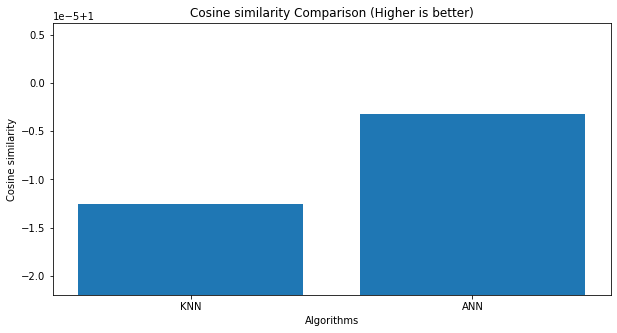

In [102]:
algorithms = ['KNN','ANN']
similarities = [sum(average_similarity_knn)/len(average_similarity_knn),sum(average_similarity_ann)/len(average_similarity_ann)]
print(similarities)

plt.figure(figsize=[10,5])
plt.bar(algorithms, similarities)
plt.xlabel("Algorithms")
plt.ylabel("Cosine similarity")
plt.ylim([min(similarities)-(max(similarities)-min(similarities)),max(similarities)+(max(similarities)-min(similarities))])
plt.title("Cosine similarity Comparison (Higher is better)")

### Euclidean distance comparision

[44634.39315057488, 56069.4414006994]


Text(0.5, 1.0, 'Euclidean distance Comparison (Lower is better)')

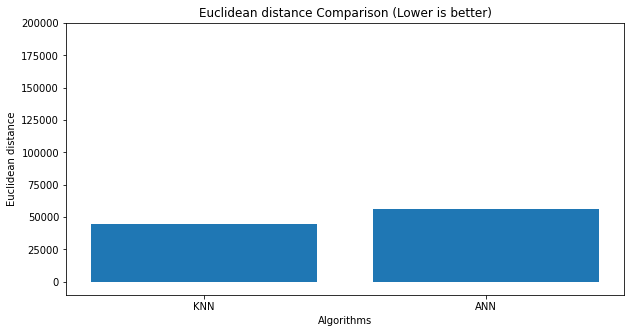

In [103]:
algorithms = ['KNN','ANN']
distance = [np.mean(Euclidean_knn),np.mean(Euclidean_ann)]
print(distance)

plt.figure(figsize=[10,5])
plt.bar(algorithms, distance)
plt.xlabel("Algorithms")
plt.ylabel("Euclidean distance")
plt.ylim(-10000,200000)
plt.title("Euclidean distance Comparison (Lower is better)")